# Lab - Week2

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Questions:

1. When do the first and last flights leave each day?

1. When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

1. Which carrier has the worst dep_delays?

1. Which plane (tailnum) has the worst on-time record?

1. For each plane, count the number of flights before the first delay of greater than 1 hour.

1. By using the flights data find all flights:

1. Had an arrival delay of two or more hours.

1. Flew to Houston (IAH or HOU)

1. Were operated by American, Delta

1. How many values are missing in dep_time?

1. Sort flight to find fastest flight.

1. Which flights travelled the shortest?

1. Merge `flights` dataframe with `weather` dataframe and investigate if weather has any affect on delays

In [2]:
import pandas as pd

flights = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv')

weather = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/relational_data/nyc_weather.csv')

# example merge:
# flights.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

In [3]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [4]:
#When do the first and last flights leave each day?

import pandas as pd

# Convert 'year', 'month', 'day', 'hour', and 'minute' columns to a datetime object
flights['dep_datetime'] = pd.to_datetime(flights[['year', 'month', 'day', 'hour', 'minute']])

# Group by 'year', 'month', and 'day', and then find the first and last flights
first_flights = flights.loc[flights.groupby(['year', 'month', 'day'])['dep_datetime'].idxmin()]
last_flights = flights.loc[flights.groupby(['year', 'month', 'day'])['dep_datetime'].idxmax()]

print("First flights of each day:")
print(first_flights[['year', 'month', 'day', 'dep_datetime']])

print("\nLast flights of each day:")
print(last_flights[['year', 'month', 'day', 'dep_datetime']])


First flights of each day:
        year  month  day        dep_datetime
0       2013      1    1 2013-01-01 05:15:00
844     2013      1    2 2013-01-02 05:00:00
1788    2013      1    3 2013-01-03 05:00:00
2701    2013      1    4 2013-01-04 05:00:00
3616    2013      1    5 2013-01-05 05:00:00
...      ...    ...  ...                 ...
106893  2013     12   27 2013-12-27 05:00:00
107852  2013     12   28 2013-12-28 05:00:00
108667  2013     12   29 2013-12-29 05:00:00
109557  2013     12   30 2013-12-30 05:00:00
110523  2013     12   31 2013-12-31 05:00:00

[365 rows x 4 columns]

Last flights of each day:
        year  month  day        dep_datetime
835     2013      1    1 2013-01-01 23:59:00
842     2013      1    2 2013-01-02 23:59:00
1785    2013      1    3 2013-01-03 23:59:00
2699    2013      1    4 2013-01-04 23:59:00
3614    2013      1    5 2013-01-05 23:59:00
...      ...    ...  ...                 ...
106887  2013     12   27 2013-12-27 23:59:00
107850  2013     12   

Consistent Early Morning Departures:

The earliest flights depart very early in the morning. For many days, the first flight departs precisely at 05:00 AM, though on January 1st, the first flight departed at 05:15 AM. This shows that airlines have a consistent schedule for starting their operations early in the day.
Late Night Departures:

The last flights of each day, based on the sample provided, depart exactly at 23:59 (or 11:59 PM). This implies that there is a consistent pattern of having a flight right before midnight each day.

In [5]:
#When there is a missing value in dep_time then this is an indication of canceled flight. Find the number of cancelled flights for each (carrier, origin) combination.

import pandas as pd

# Filter rows where dep_time is NaN, indicating cancelled flights
cancelled_flights = flights[flights['dep_time'].isna()]

# Group by 'carrier' and 'origin' and count the number of flights
cancelled_count = cancelled_flights.groupby(['carrier', 'origin']).size().reset_index(name='cancelled_count')

print(cancelled_count)


   carrier origin  cancelled_count
0       9E    EWR               68
1       9E    JFK              807
2       9E    LGA              169
3       AA    EWR               99
4       AA    JFK              141
5       AA    LGA              396
6       AS    EWR                2
7       B6    EWR               74
8       B6    JFK              315
9       B6    LGA               77
10      DL    EWR               39
11      DL    JFK              100
12      DL    LGA              210
13      EV    EWR             2164
14      EV    JFK               82
15      EV    LGA              571
16      F9    LGA                3
17      FL    LGA               73
18      MQ    EWR              168
19      MQ    JFK              327
20      MQ    LGA              739
21      OO    LGA                3
22      UA    EWR              435
23      UA    JFK               44
24      UA    LGA              207
25      US    EWR               75
26      US    JFK               26
27      US    LGA   

In [6]:
#3Which carrier has the worst dep_delays?
import pandas as pd

# Group by 'carrier' and compute the average departure delay for each carrier
average_delays = flights.groupby('carrier')['dep_delay'].mean().reset_index()

# Sort the carriers by average departure delay in descending order
sorted_delays = average_delays.sort_values(by='dep_delay', ascending=False)

# Get the carrier with the highest average departure delay
worst_carrier = sorted_delays.iloc[0]

print(worst_carrier)


carrier             F9
dep_delay    20.215543
Name: 6, dtype: object


In [7]:
#4Which plane (tailnum) has the worst on-time record?

import pandas as pd

# Create a new column 'total_delay' which is the sum of 'dep_delay' and 'arr_delay' for each flight
flights['total_delay'] = flights['dep_delay'] + flights['arr_delay']

# Group by 'tailnum' and compute the average total delay for each plane
average_delays = flights.groupby('tailnum')['total_delay'].mean().reset_index()

# Sort the planes by average total delay in descending order
sorted_delays = average_delays.sort_values(by='total_delay', ascending=False)

# Get the plane with the highest average total delay
worst_plane = sorted_delays.iloc[0]

print(worst_plane)


tailnum        N844MH
total_delay     617.0
Name: 3409, dtype: object


In [8]:
#5For each plane, count the number of flights before the first delay of greater than 1 hour.
import pandas as pd

# Sort the flights dataframe by tailnum and departure time
flights_sorted = flights.sort_values(by=['tailnum', 'dep_datetime'])

# Define a custom aggregation function
def count_before_large_delay(s):
    return (s <= 60).sum() if (s > 60).any() else len(s)

# Group by tailnum and aggregate using the custom function
result = flights_sorted.groupby('tailnum')['dep_delay'].agg(count_before_large_delay).reset_index()

# Rename columns for clarity
result.columns = ['tailnum', 'flights_before_large_delay']

print(result)


     tailnum  flights_before_large_delay
0     D942DN                           3
1     N0EGMQ                         331
2     N10156                         129
3     N102UW                          46
4     N103US                          46
...      ...                         ...
4038  N997DL                          60
4039  N998AT                          22
4040  N998DL                          68
4041  N999DN                          55
4042  N9EAMQ                         223

[4043 rows x 2 columns]


In [13]:
#6By using the flights data find all flights:
#7,8,9
#7Had an arrival delay of two or more hours.
#8Flew to Houston (IAH or HOU)
#9Were operated by American, Delta
delayed_flights = flights[flights['arr_delay'] >= 120]
houston_flights = flights[flights['dest'].isin(['IAH', 'HOU'])]
american_delta_flights = flights[flights['carrier'].isin(['AA', 'DL'])]
delayed_flights


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_datetime,total_delay
119,2013,1,1,811.0,630,101.0,1047.0,830,137.0,MQ,...,N531MQ,LGA,CLT,118.0,544,6,30,2013-01-01T11:00:00Z,2013-01-01 06:30:00,238.0
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,...,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01T23:00:00Z,2013-01-01 18:35:00,1704.0
218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,...,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01T12:00:00Z,2013-01-01 07:33:00,267.0
268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,...,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01T14:00:00Z,2013-01-01 09:00:00,279.0
447,2013,1,1,1505.0,1310,115.0,1638.0,1431,127.0,EV,...,N17984,EWR,RIC,63.0,277,13,10,2013-01-01T18:00:00Z,2013-01-01 13:10:00,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336579,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,...,N916XJ,JFK,BNA,95.0,765,15,45,2013-09-30T19:00:00Z,2013-09-30 15:45:00,279.0
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,...,N13988,EWR,SAV,95.0,708,16,49,2013-09-30T20:00:00Z,2013-09-30 16:49:00,356.0
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,...,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30T22:00:00Z,2013-09-30 18:15:00,294.0
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,...,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30T22:00:00Z,2013-09-30 18:45:00,388.0


In [16]:
#8Flew to Houston (IAH or HOU)

houston_flights


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_datetime,total_delay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,2013-01-01 05:15:00,13.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,2013-01-01 05:29:00,24.0
32,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,...,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01T11:00:00Z,2013-01-01 06:27:00,-3.0
81,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,...,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01T12:00:00Z,2013-01-01 07:32:00,-1.0
89,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,...,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01T12:00:00Z,2013-01-01 07:39:00,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336524,2013,9,30,1729.0,1720,9.0,2001.0,2010,-9.0,UA,...,N455UA,EWR,IAH,173.0,1400,17,20,2013-09-30T21:00:00Z,2013-09-30 17:20:00,0.0
336527,2013,9,30,1735.0,1715,20.0,2010.0,2005,5.0,WN,...,N296WN,EWR,HOU,188.0,1411,17,15,2013-09-30T21:00:00Z,2013-09-30 17:15:00,25.0
336618,2013,9,30,1859.0,1859,0.0,2134.0,2159,-25.0,UA,...,N14731,LGA,IAH,180.0,1416,18,59,2013-09-30T22:00:00Z,2013-09-30 18:59:00,-25.0
336694,2013,9,30,2015.0,2015,0.0,2244.0,2307,-23.0,UA,...,N17730,EWR,IAH,174.0,1400,20,15,2013-10-01T00:00:00Z,2013-09-30 20:15:00,-23.0


In [17]:
#9Were operated by American, Delta
american_delta_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_datetime,total_delay
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,2013-01-01 05:40:00,35.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,2013-01-01 06:00:00,-31.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01T11:00:00Z,2013-01-01 06:00:00,6.0
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,...,N3DUAA,LGA,DFW,257.0,1389,6,0,2013-01-01T11:00:00Z,2013-01-01 06:00:00,30.0
20,2013,1,1,602.0,610,-8.0,812.0,820,-8.0,DL,...,N971DL,LGA,MSP,170.0,1020,6,10,2013-01-01T11:00:00Z,2013-01-01 06:10:00,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336709,2013,9,30,2032.0,2045,-13.0,2147.0,2225,-38.0,AA,...,N434AA,LGA,ORD,105.0,733,20,45,2013-10-01T00:00:00Z,2013-09-30 20:45:00,-51.0
336715,2013,9,30,2041.0,2045,-4.0,2147.0,2208,-21.0,DL,...,N359NB,JFK,BOS,37.0,187,20,45,2013-10-01T00:00:00Z,2013-09-30 20:45:00,-25.0
336718,2013,9,30,2050.0,2045,5.0,20.0,53,-33.0,DL,...,N396DA,JFK,SJU,188.0,1598,20,45,2013-10-01T00:00:00Z,2013-09-30 20:45:00,-28.0
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,...,N193DN,JFK,LAX,296.0,2475,21,0,2013-10-01T01:00:00Z,2013-09-30 21:00:00,-4.0


In [18]:
#10How many values are missing in dep_time?
missing_dep_time_values = flights['dep_time'].isna().sum()
print(missing_dep_time_values)


8255


In [21]:
#11Sort flight to find fastest flight.
sorted_flights = flights.sort_values(by='air_time', ascending=True)
fastest_flight = sorted_flights.iloc[0]

fastest_flight


year                              2013
month                                4
day                                 13
dep_time                         537.0
sched_dep_time                     527
dep_delay                         10.0
arr_time                         622.0
sched_arr_time                     628
arr_delay                         -6.0
carrier                             EV
flight                            4631
tailnum                         N12167
origin                             EWR
dest                               BDL
air_time                          20.0
distance                           116
hour                                 5
minute                              27
time_hour         2013-04-13T09:00:00Z
dep_datetime       2013-04-13 05:27:00
total_delay                        4.0
Name: 176604, dtype: object

In [24]:
# Fetch the flight name (or number) of the fastest flight
fastest_flight_number = sorted_flights.iloc[0]['flight']

print(fastest_flight_number)

4631


In [28]:
# Fetch the flight name (or number) of the flight with the shortest distance
# Which flights travelled the shortest?
sorted_flights_by_distance = flights.sort_values(by='distance', ascending=True)
shortest_flights = sorted_flights_by_distance[sorted_flights_by_distance['distance'] == sorted_flights_by_distance['distance'].iloc[0]]

# Get the flight numbers of the shortest flights
shortest_flight_numbers = shortest_flights['flight'].tolist()

print(shortest_flight_numbers)


[1632]


In [29]:
#Merge flights dataframe with weather dataframe and investigate if weather has any affect on delays
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [30]:
merged_df = pd.merge(flights, weather, on=['year', 'month', 'day', 'hour', 'origin'], how='left')


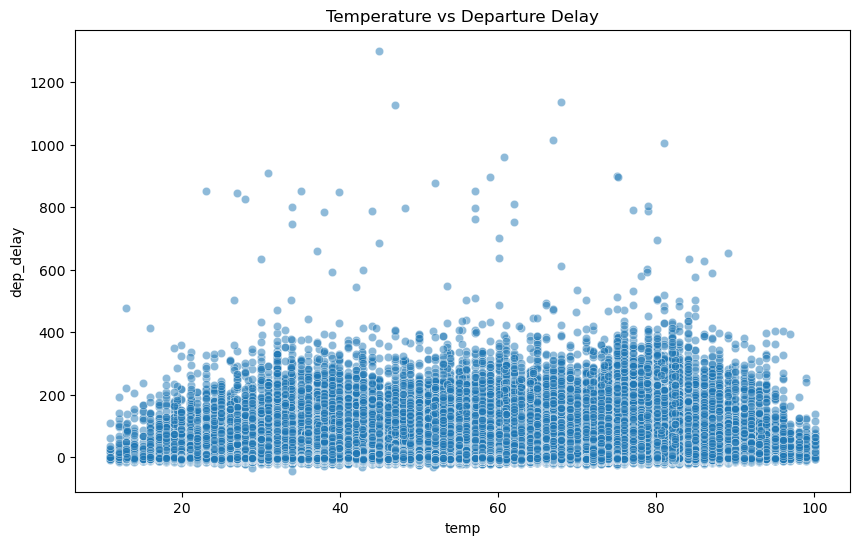

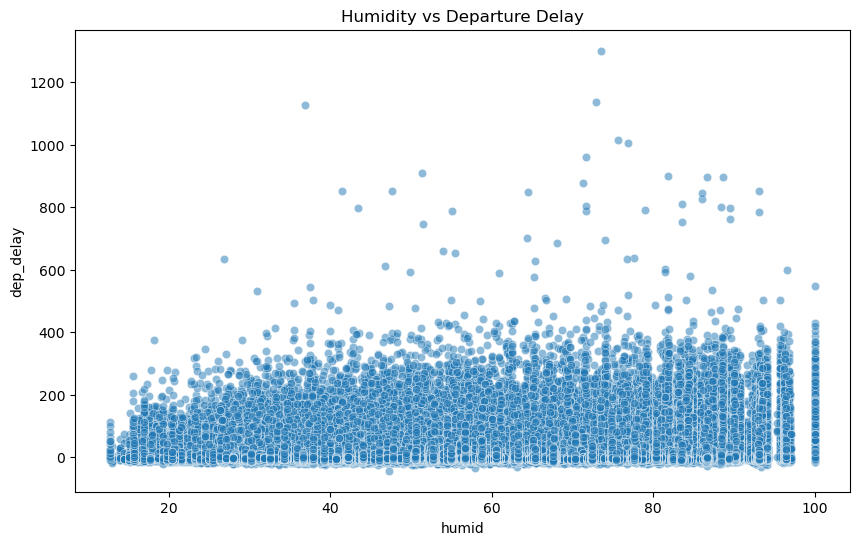

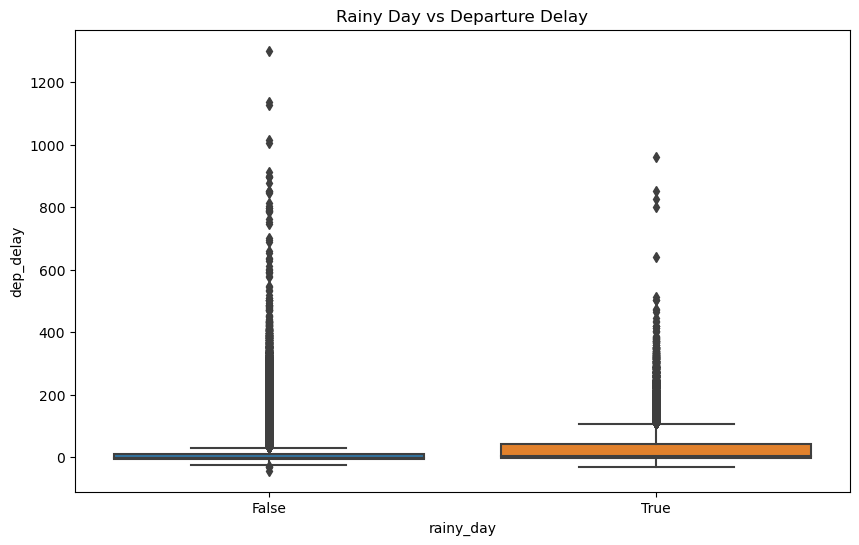

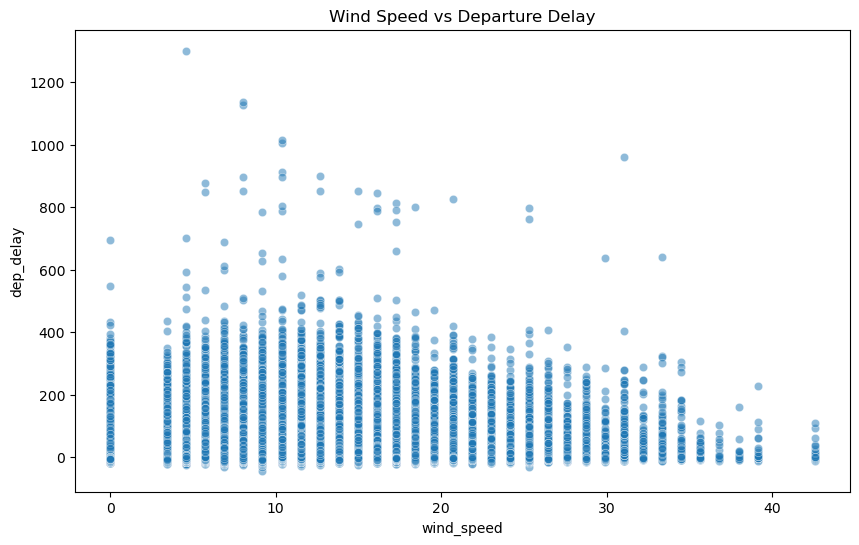

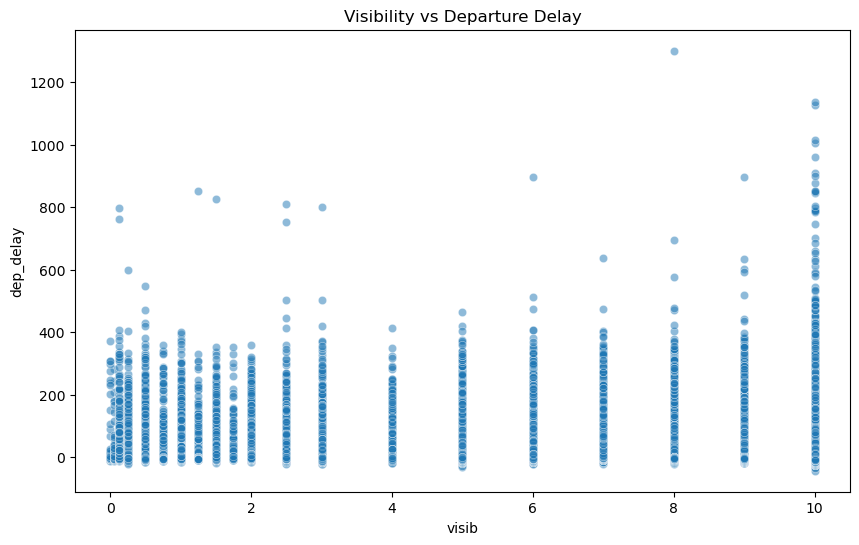

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='dep_delay', data=merged_df, alpha=0.5)
plt.title('Temperature vs Departure Delay')
plt.show()




plt.figure(figsize=(10, 6))
sns.scatterplot(x='humid', y='dep_delay', data=merged_df, alpha=0.5)
plt.title('Humidity vs Departure Delay')
plt.show()


merged_df['rainy_day'] = merged_df['precip'] > 0
plt.figure(figsize=(10, 6))
sns.boxplot(x='rainy_day', y='dep_delay', data=merged_df)
plt.title('Rainy Day vs Departure Delay')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='dep_delay', data=merged_df, alpha=0.5)
plt.title('Wind Speed vs Departure Delay')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='visib', y='dep_delay', data=merged_df, alpha=0.5)
plt.title('Visibility vs Departure Delay')
plt.show()


The scatter plot illustrates the relationship between temperature and departure delay, with most data points clustered at lower delay durations and increasing temperatures.



Most of the departure delays seem to be clustered around the lower delay times, irrespective of humidity levels.
There are a few scattered points of higher departure delay times at various humidity levels, but no clear trend suggesting that higher humidity levels directly correlate with longer delays.
Rainy Day vs Departure Delay:

On non-rainy days (False), there's a large concentration of flights with minimal delays. However, there are still some flights with significant delays.
On rainy days (True), while there's a concentration of flights with minimal delays, the spread of delay times seems more varied, with several instances of longer delays.
Wind Speed vs Departure Delay:

A majority of flights experience minimal delay, irrespective of wind speeds.
There are instances of increased delay times at various wind speeds, but there's no clear pattern suggesting that wind speed has a strong impact on departure delay.